In [0]:
import numpy as np
import pandas as pd # Just to read in the csv file
from matplotlib import pyplot as plt # Visualize the Neural Network's output

In [0]:
# Read in image CSV files
train_df = pd.read_csv('.../Images/fashion-mnist_train.csv')
test_df = pd.read_csv('.../Images/fashion-mnist_test.csv')

# Convert it to a numpy array
train_np = np.array(train_df)
test_np = np.array(test_df)

# Transpose rows to columns
train_trans = train_np.T
test_trans = test_np.T

# Seperate X (features) and Y (targets)
y_train = train_trans[0]
X_train = train_trans[1:]

y_test = test_trans[0]
X_test = test_trans[1:]

# Normalize the pixel range of the image arrays from 0-255 (256 pixels) to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:

# Initalize random params for the neural networks first forward pass. 
def init_params():
  W1 = np.random.rand(100, 784) - 0.5
  b1 = np.zeros((100, 1))
  W2 = np.random.rand(50, 100) - 0.5
  b2 = np.zeros((50, 1))
  W3 = np.random.rand(30, 50) - 0.5
  b3 = np.zeros((30, 1))
  W4 = np.random.rand(10, 30) - 0.5
  b4 = np.zeros((10, 1))
  return W1, b1, W2, b2, W3, b3, W4, b4

# Define the Activiation Function. In this case we'll use ReLU (if Z > 0 return Z, else 0).
def ReLU(Z):
  # Numpy maximum function iterates through entire array.
  return np.maximum(Z, 0)

# Returns output layer results into probability distribution for each possible outcome that sum to 1.
def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

# Create basic forward prop with input layer, 1 hidden layer, and output layer.
def forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = ReLU(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = ReLU(Z3)
  Z4 = W4.dot(A3) + b4
  A4 = softmax(Z4)
  return Z1, A1, Z2, A2, Z3, A3, Z4, A4


In [0]:

# One hot encode the y targets.
def one_hot(y):
    # inner parentheses create a tuple with the dimensions of y, np.zeros creates an array of zeros of the argument, but only accepts a single argument, in this case a tuple.
  one_hot_y = np.zeros((y.size, y.max() + 1))
  one_hot_y[np.arange(y.size), y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y

def deriv_ReLU(Z):
    # ReLU is simple linear regression beyond 0, so derivative is equal to Z if greater than 0.
  return Z > 0

# Find the difference between the softmax probability and the correct answer. Apply that probability difference to each forward prop stage in reverse.
def back_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W2, W3, W4, X, y):
  m = y.size
  one_hot_y = one_hot(y)
  # Output Layer
  dZ4 = A4 - one_hot_y
  dW4 = 1 / m * dZ4.dot(A3.T)
  db4 = 1 / m * np.sum(dZ4)
  # 3rd Hidden Layer
  dZ3 = W4.T.dot(dZ4) * deriv_ReLU(Z3)
  dW3 = 1 / m * dZ3.dot(A2.T)
  db3 = 1 / m * np.sum(dZ3)
  # 2nd Hidden Layer
  dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  # 1st Hidden Layer
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2, dW3, db3, dW4, db4

# Update your forward prop parameters with the differences found from back propagation
  # Use Alpha as your learning rate to determine how aggressive your neural network will update between epochs. 
def update_params(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  W3 = W3 - alpha * dW3
  b3 = b3 - alpha * db3
  W4 = W4 - alpha * dW4
  b4 = b4 - alpha * db4
  return W1, b1, W2, b2, W3, b3, W4, b4


In [0]:

def get_predictions(A4):
    # Take A4 output of neural network and return the index of the highest softmax value. Aka, highest probability == 1, rest are 0, to match the format of the one-hot encoded targets so they can be effectively compared.
  return np.argmax(A4, 0)

def get_accuracy(predictions, y):
    # print prediction and actual target
  print(predictions, y)
    # print number of accurate predictions divided by array size
  return np.sum(predictions == y) / y.size

# Put it all together to create a gradient descent
def gradient_descent(X, y, iterations, alpha):
  W1, b1, W2, b2, W3, b3, W4, b4 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X)
    dW1, db1, dW2, db2, dW3, db3, dW4, db4 = back_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W2, W3, W4, X, y)
    W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2, W3, b3, W4, b4, dW1, db1, dW2, db2, dW3, db3, dW4, db4, alpha)
      # Every n (in this case 10) iterations, perform accuracy check:
    if (i % 10 == 0):
      print("Iteration: ", i)
      predictions = get_predictions(A4)
      print("Accuracy: ", get_accuracy(predictions, y))
  return W1, b1, W2, b2, W3, b3, W4, b4


In [0]:
W1, b1, W2, b2, W3, b3, W4, b4 = gradient_descent(X_train, y_train, 500, 0.1)

Iteration:  0
[3 3 3 ... 0 3 3] [2 9 6 ... 8 8 7]
Accuracy:  0.12231666666666667
Iteration:  10
[4 7 2 ... 6 4 7] [2 9 6 ... 8 8 7]
Accuracy:  0.3395666666666667
Iteration:  20
[4 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.45626666666666665
Iteration:  30
[8 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.5218833333333334
Iteration:  40
[8 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.5518333333333333
Iteration:  50
[8 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.5753166666666667
Iteration:  60
[8 9 2 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6107
Iteration:  70
[8 9 2 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6372166666666667
Iteration:  80
[8 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6585333333333333
Iteration:  90
[8 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.67535
Iteration:  100
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6884333333333333
Iteration:  110
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8 7]
Accuracy:  0.6998333333333333
Iteration:  120
[8 7 6 ... 8 8 7] [2 9 6 ... 8 8

In [0]:
def make_predictions(W1, b1, W2, b2, W3, b3, W4, b4, X):
    # Only need output layer (A4)
  _, _, _, _, _, _, _, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X)
  predictions = get_predictions(A4)
  return predictions

fashion_mapping = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Compare predictions to their actual target labels. Output digit visualization to spot check inaccurate digits. 
def test_predictions(W1, b1, W2, b2, W3, b3, W4, b4, X, y, test_index):
  current_image = X[:, test_index, None]
  prediction = make_predictions(W1, b1, W2, b2, W3, b3, W4, b4, current_image)
  label = y[test_index]
  prediction_name = fashion_mapping[prediction[0]]
  label_name = fashion_mapping[label]
  print("Prediction: ", prediction_name)
  print("Label: ", label_name)
    #reshape back into correct matrix
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation="nearest")
  plt.show()


Prediction:  Sandal
Label:  Sandal


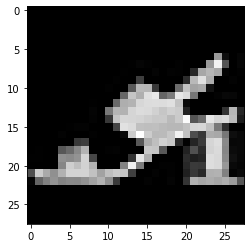

In [0]:
test_predictions(W1, b1, W2, b2, W3, b3, W4, b4, X_train, y_train, 50)

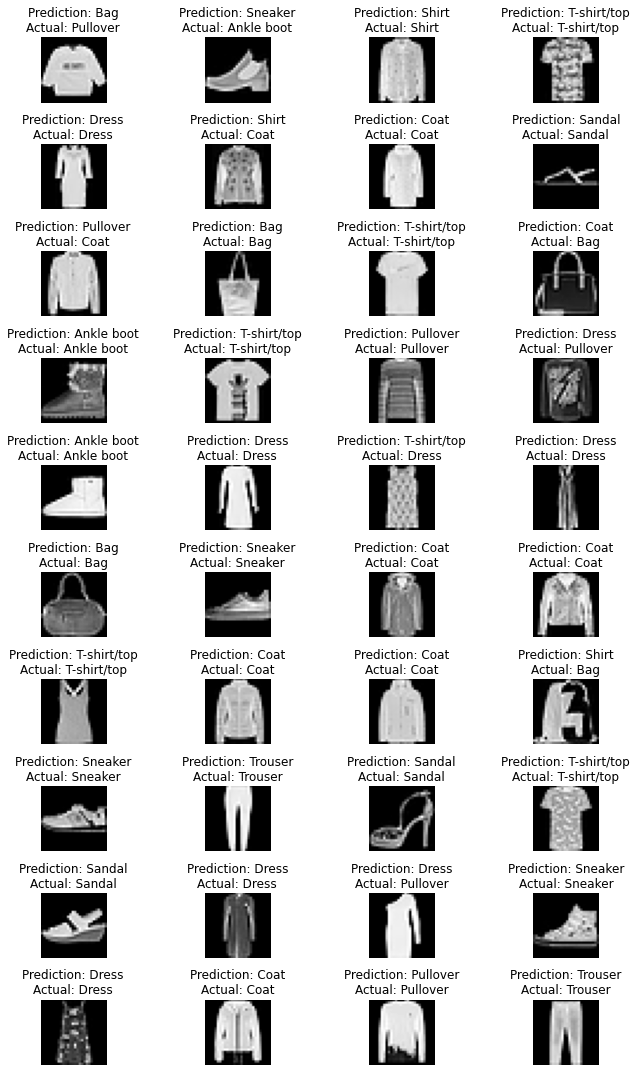

In [0]:
def display_multi_preds(W1, b1, W2, b2, W3, b3, W4, b4, X, y, test_index):
  current_image = X[:, test_index, None]
  prediction = make_predictions(W1, b1, W2, b2, W3, b3, W4, b4, current_image)
  label = y[test_index]
  current_image = current_image.reshape((28, 28)) * 255
  return prediction, label, current_image

fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(40):
  prediction, label, current_image = display_multi_preds(W1, b1, W2, b2, W3, b3, W4, b4, X_train, y_train, i)
  prediction_name = fashion_mapping[prediction[0]]
  label_name = fashion_mapping[label]
  plt.subplot(10,4,i+1)
  plt.imshow(current_image)
  plt.title(f'Prediction: {prediction_name}\nActual: {label_name}')
  plt.axis('off')
fig.tight_layout()
plt.show()

In [0]:
test_preds = make_predictions(W1, b1, W2, b2, W3, b3, W4, b4, X_test)
get_accuracy(test_preds, y_test)

[0 1 2 ... 8 2 2] [0 1 2 ... 8 8 1]
Out[26]: 0.8031

### Training data reach 80.56% accuracy after 500 epochs. 
### Testing data achieved 80.31% accuracy with the same weights and biases.